In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('epa_air_quality_annual_summary.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Prep course Capstone Project: Air quality study for cities in GA.


This dataset is a summary of air quality from 1987 to 2017 downloaded from Kaggle. Data source is from EPA. The Environmental Protection Agency (EPA) creates air quality trends using measurements from monitors located across the country. All of this data comes from EPA’s Air Quality System (AQS). Data collection agencies report their data to the EPA via this system and it calculates several types of aggregate (summary) data for EPA internal use.

By looking through this dataset, three questions came into my mind.

1. Is Atlanta the most polluted city in Georgia over the years from 1987 to 2017?
2. How does air quality trend over time?
3. Find out the major pollutants which affeted air quality. For example: PM10, Sulfur Oxides.

In [3]:
df1=df[['state_name','city_name','year','parameter_name','sample_duration','arithmetic_mean','arithmetic_standard_dev']].sort_values(by='year',ascending=True)

In [4]:
georgia = df1[df1.state_name == 'Georgia']
georgia1 = georgia[['city_name', 'year', 'arithmetic_mean']].reset_index()

In [20]:
city_mean = georgia.groupby(['city_name']).mean().sort_values('arithmetic_mean', ascending=True).reset_index()

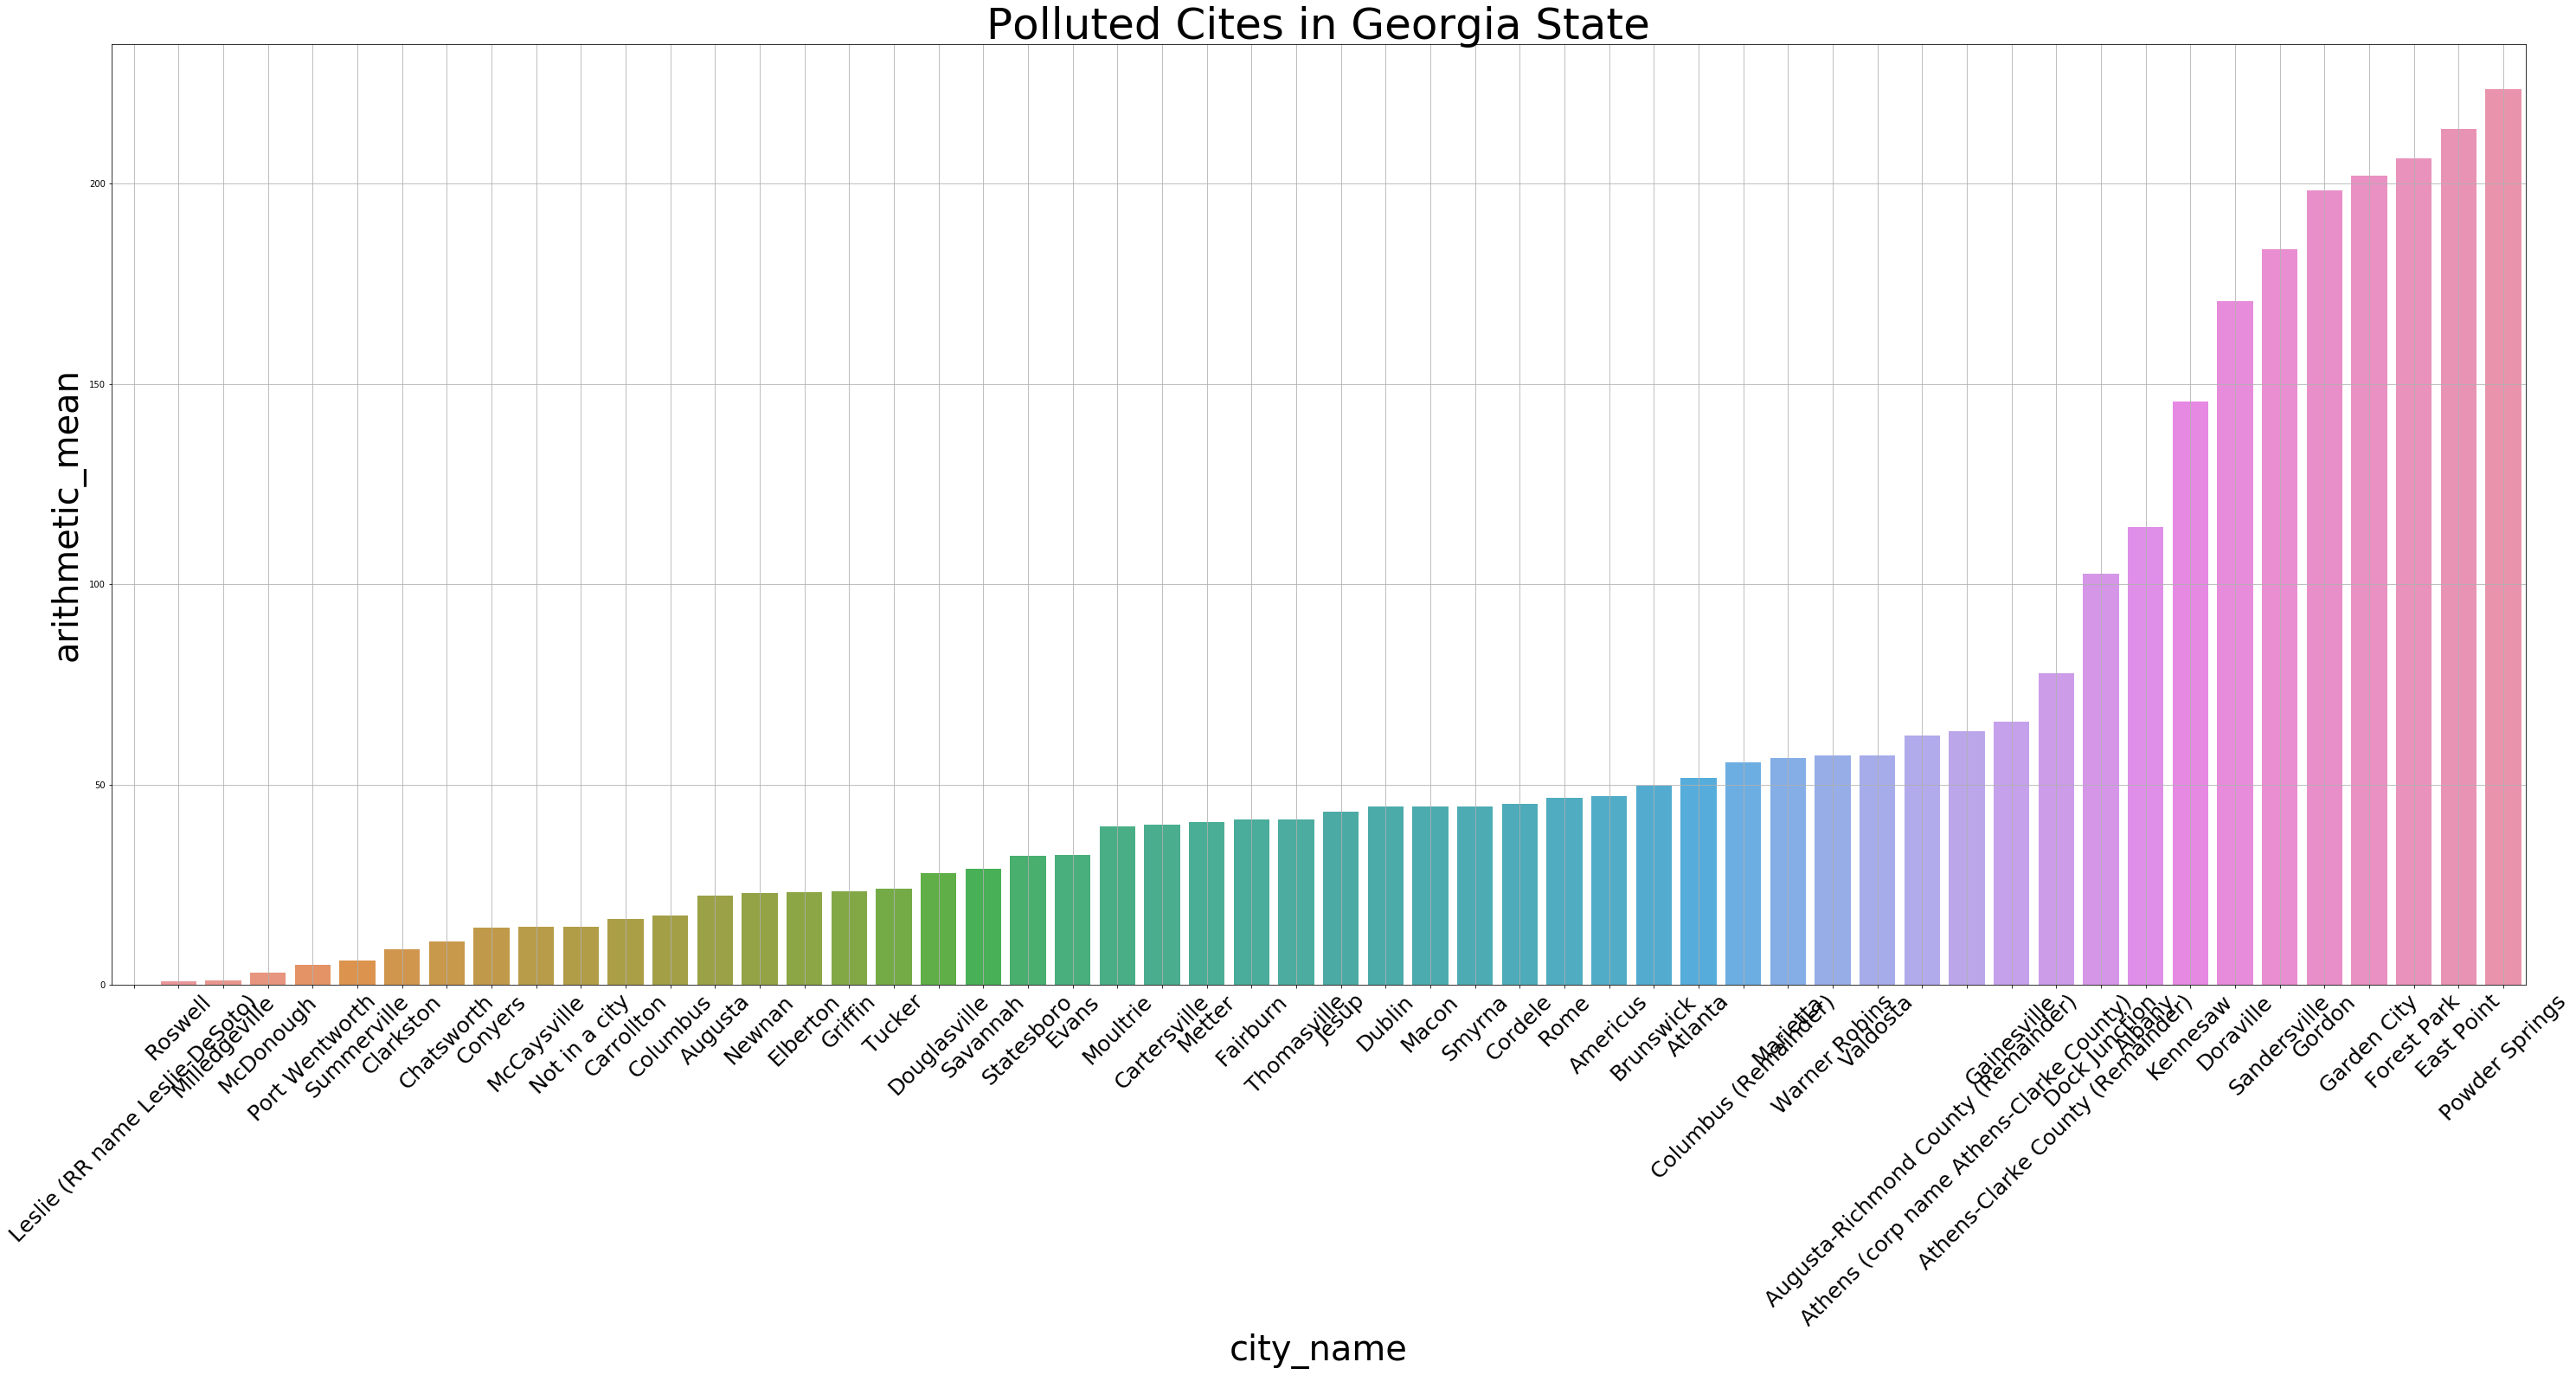

The top five polluted cities in Georgia based on arithmetic mean values are: Powder Springs, East Point, Forest Park, Garden City Gordon


In [22]:
plt.figure(figsize=(50,20))
plt.xlabel('City Names',size=40)
plt.xticks(rotation=45,size=25)
plt.ylabel('Arithmetic mean of pollutants',size=40)
plt.title('Polluted Cites in Georgia State',size=50)
sns.barplot(city_mean.city_name, city_mean.arithmetic_mean.sort_values())
                   #If I add city_mean.city_name.sort_values(), then it is just sorting the values but with fixed labels. In this case, 
                   #So I used seaborn and it looks just right. Using plt.plot() went something wrong.
plt.grid()
plt.show()
print('The top five polluted cities in Georgia based on arithmetic mean values are: Powder Springs, East Point, Forest Park, Garden City Gordon')

In [9]:
georgia_year= georgia1[['year','arithmetic_mean','city_name']].groupby(['year','city_name']).mean().reset_index()

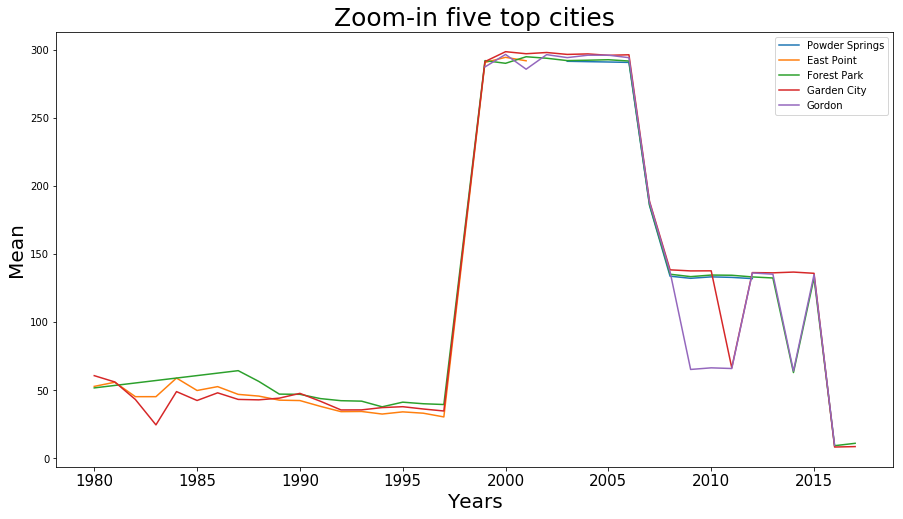

In [24]:
plt.figure(figsize=(15,8))
plt.title('Zoom-in five top cities',size=25)
plt.xlabel('Years', size=20)
plt.ylabel('Mean',size=20)
plt.xticks(size=15)
plt.plot(georgia_year[georgia_year.city_name=='Powder Springs'].year,georgia_year[georgia_year.city_name=='Powder Springs'].arithmetic_mean)
plt.plot(georgia_year[georgia_year.city_name=='East Point'].year,georgia_year[georgia_year.city_name=='East Point'].arithmetic_mean)
plt.plot(georgia_year[georgia_year.city_name=='Forest Park'].year,georgia_year[georgia_year.city_name=='Forest Park'].arithmetic_mean)
plt.plot(georgia_year[georgia_year.city_name=='Garden City'].year,georgia_year[georgia_year.city_name=='Garden City'].arithmetic_mean)
plt.plot(georgia_year[georgia_year.city_name=='Gordon'].year,georgia_year[georgia_year.city_name=='Gordon'].arithmetic_mean)
plt.legend(['Powder Springs','East Point','Forest Park','Garden City','Gordon'])
plt.show()

During year 1996 to 2007, the mean of pollutants were dramastically increased from average 50 up to 300. What happened? 

The 1996 Summer Olympics, known unofficially as the Centennial Olympic Games, was a major international multi-sport event that took place in Atlanta, Georgia in 1996. This event stimulated local economy and attracted  tourism, manufacturing, agriculture, etc. coming into Georgia state. It is reasonable to assume air quality during this period of time affected by the historical event and its post effects.

When it was getting close to economic crisis in year 2008, the pollution level largely dropped down to half of the peak values. 

Now, let's take a closer look on the top three cities and see what are the most frequent pollutions factors.

In [16]:
georgia = df1[df1.state_name == 'Georgia']
georgia2 = georgia[['city_name', 'year', 'arithmetic_mean','parameter_name']].reset_index()
par_val_count=georgia2.parameter_name.value_counts()

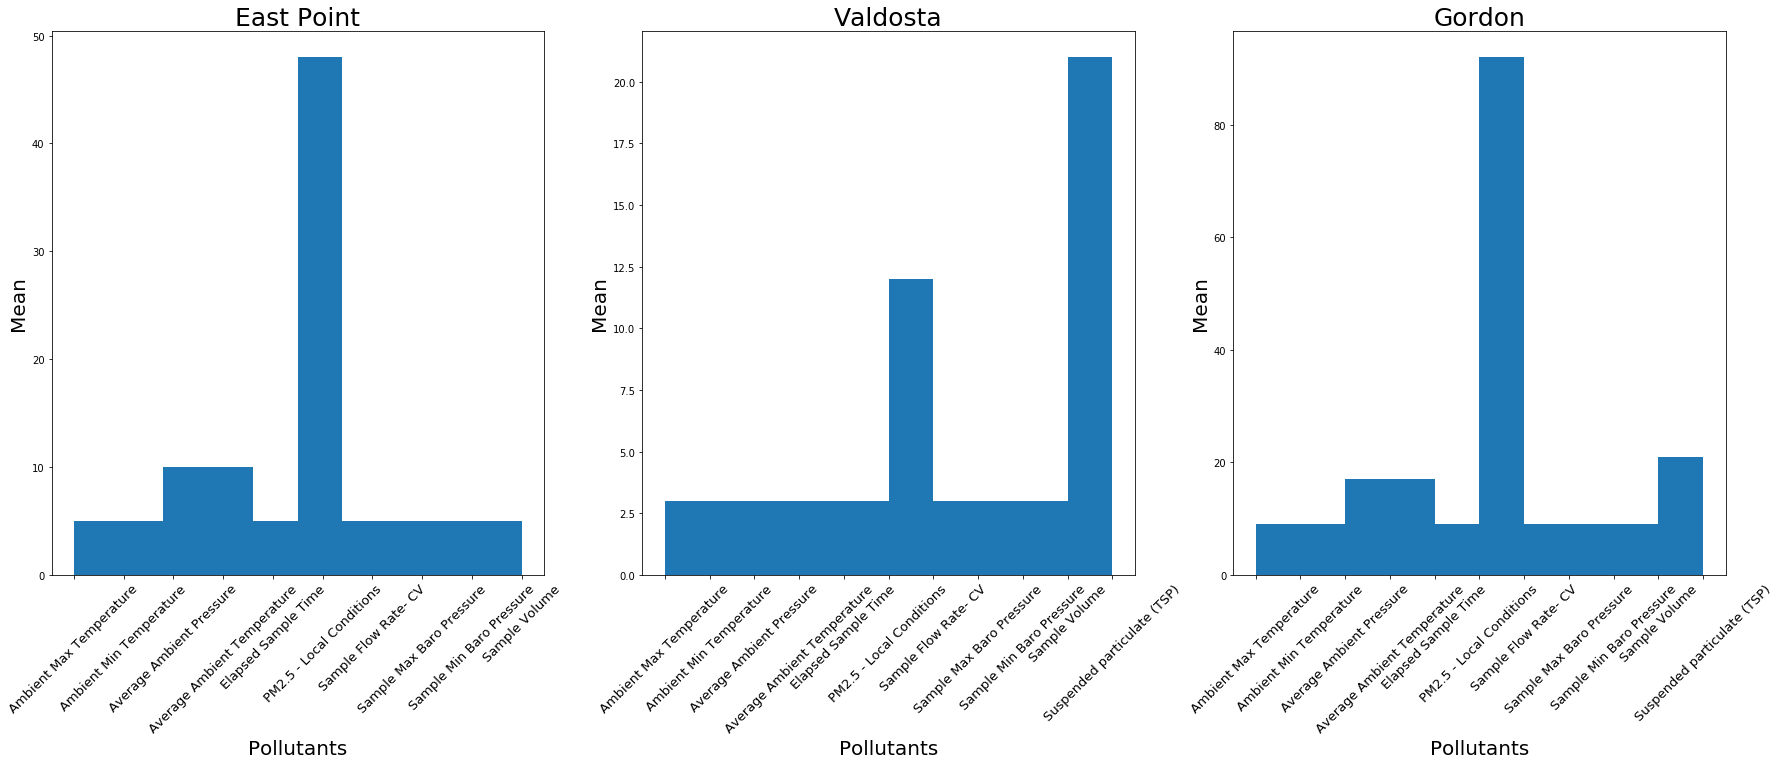

In [30]:
plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
plt.hist(georgia2[georgia2.city_name=='Powder Springs'].parameter_name) #georgia2[georgia2.city_name=='Atlanta'].arithmetic_mean)
plt.xlabel('Pollutants', size=20)
plt.ylabel('Mean',size=20)
plt.title('East Point',size=25)
plt.xticks(size=13,rotation=45)

plt.subplot(1, 3, 2)
plt.hist(georgia2[georgia2.city_name=='East Point'].parameter_name)
plt.xlabel('Pollutants', size=20)
plt.ylabel('Mean',size=20)
plt.title('Valdosta',size=25)
plt.xticks(size=13,rotation=45)

plt.subplot(1, 3, 3)
plt.hist(georgia2[georgia2.city_name=='Forest Park'].parameter_name)
plt.xlabel('Pollutants', size=20)
plt.ylabel('Mean',size=20)
plt.title('Gordon',size=25)
plt.xticks(size=13,rotation=45)

plt.show()

Conclusion:

1. The top polluted city is Powder Springs.

2. International event and economic change may strongly impact local air quality. 

3. Unexpectedly, the major parameters affected the air quality shown in the histograms are neither Fine particulate matter (e.g. PM 2.5) nor compounds (e.g. Sulfur dioxide) 